Tugas Akhir : 

### Analisis Sentimen Mitra untuk Telkom University Pada Media Sosial Twitter Menggunakan Algoritma Decision Tree (CART)

Sean Akbar Ryanto (1301180258)

# Library Package

## Install Library

In [1]:
# Library package untuk preprocessing stopwords removal dan stemming
!pip install PySastrawi
!pip install -U nltk
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.6 MB/s 
     |████████████████████████████████| 1.3 MB 9.8 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=430272a77291ad7c81b018b25498a5d336d5650ba03ee33f5e18ea514b4636d7
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


## Import Library

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import matplotlib.pyplot as plt
import seaborn as sns 

from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Sentimen

## Read Data

In [3]:
data = pd.read_csv('Dataset Internal Labelled.csv')
data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,1
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",0
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,0
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,1
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",1
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,0
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,0
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",0
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,0


In [4]:
data['Sentiment'].replace(to_replace = -1, value = 'negatif', inplace=True)
data['Sentiment'].replace(to_replace = 0, value = 'netral', inplace=True)
data['Sentiment'].replace(to_replace = 1, value = 'positif', inplace=True)

data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,positif
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,positif
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,netral
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",netral
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,netral


Text(0.5, 0, 'Sentimen')

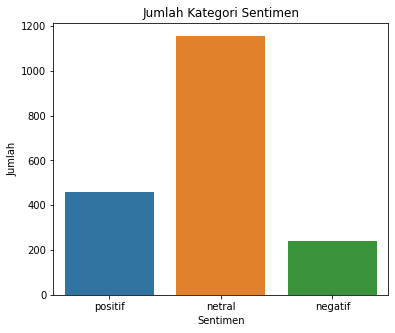

In [5]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
sns.countplot(x='Sentiment', data=data)
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

In [6]:
data['Sentiment'].value_counts()

netral     1156
positif     457
negatif     239
Name: Sentiment, dtype: int64

In [7]:
# Menyalin data yang dimiliki kedalam variabel lain
sentimen1 = data.copy()

## Translate Data

In [8]:
# from googletrans import Translator

# translator = Translator()

In [9]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(translator.translate, src='en', dest='id')

In [10]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(getattr, args=('text',))

# sentimen1

# Data Splitting

In [11]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 80:20
x1 = sentimen1['Text Tweet']
y1 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20 , shuffle=True, random_state=123)

In [12]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 75:25
x2 = sentimen1['Text Tweet']
y2 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25 , shuffle=True, random_state=123)

In [13]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 70:30
x3 = sentimen1['Text Tweet']
y3 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30 , shuffle=True, random_state=123)

# Feature Extraction TF-IDF (80:20)

## Proses Pembobotan TF-IDF

In [14]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x1_train_tfidf = vector.transform(x1_train)
x1_test_tfidf = vector.transform(x1_test)

## Hasil Pembobotan TF-IDF

In [15]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x1_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
1496,co,0.042779
2853,https,0.042135
6754,telkomuniversity,0.036087
7526,yang,0.030279
1673,dan,0.028611
...,...,...
2878,hz5avbn3fk,0.000000
6208,sent,0.000000
2884,ibadah,0.000000
2887,ibminnovates,0.000000


In [16]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x1_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
1496,co,0.041346
2853,https,0.040033
6754,telkomuniversity,0.031899
6759,telucae,0.029668
7526,yang,0.028757
...,...,...
3575,kepingin,0.000000
3573,kepercayaan,0.000000
3571,kepending,0.000000
3569,kepastian,0.000000


# Feature Extraction TF-IDF (75:25)

## Proses Pembobotan TF-IDF

In [17]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x2_train_tfidf = vector.transform(x2_train)
x2_test_tfidf = vector.transform(x2_test)

## Hasil Pembobotan TF-IDF

In [18]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x2_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
1496,co,0.042794
2853,https,0.042162
6754,telkomuniversity,0.035914
7526,yang,0.030441
1673,dan,0.028732
...,...,...
3547,kemedikbudristek,0.000000
2127,ecsa,0.000000
6629,t2w9iiqdtw,0.000000
6628,t0e55yzssp,0.000000


In [19]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x2_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
1496,co,0.041584
2853,https,0.040368
6754,telkomuniversity,0.033251
6759,telucae,0.029054
7526,yang,0.028572
...,...,...
789,association,0.000000
3740,kotlin,0.000000
3738,kostan,0.000000
3734,kordinator,0.000000


# Feature Extraction TF-IDF (70:30)

## Proses Pembobotan TF-IDF

In [20]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x3_train_tfidf = vector.transform(x3_train)
x3_test_tfidf = vector.transform(x3_test)

## Hasil Pembobotan TF-IDF

In [21]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x3_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
1496,co,0.042194
2853,https,0.041490
6754,telkomuniversity,0.035605
7526,yang,0.030194
1673,dan,0.028630
...,...,...
5653,qatar,0.000000
3186,iyxfsmeiab,0.000000
6566,summer,0.000000
4851,nowadays,0.000000


In [22]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x3_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
1496,co,0.043186
2853,https,0.042236
6754,telkomuniversity,0.034418
7526,yang,0.029462
6759,telucae,0.028832
...,...,...
3531,kelulusanmu,0.000000
3528,keluar,0.000000
3526,kelima,0.000000
3525,kelewatan,0.000000


# Klasifikasi

In [23]:
# Library package untuk evaluasi model dengan nilai akurasi
from sklearn.metrics import accuracy_score

# Library package untuk evaluasi keseluruhan performa model
from sklearn.metrics import classification_report

## Hyperparameter Tuning GridSearchCV (80:20)

In [47]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV    # Library package untuk menggunakan validasi GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf1 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf1.fit(x1_train_tfidf, y1_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf1.best_params_)

best parameter :  {'max_depth': 9, 'splitter': 'random'}


In [48]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf1.best_score_)

accuracy :  0.7177670959550154


### Decision Tree 80:20

In [50]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf1 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=9)
dt_clf1.fit(x1_train_tfidf, y1_train)

# Memprediksi label sentimen dengan data validasi
dt_predict1 = dt_clf1.predict(x1_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict1, y1_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict1, y1_test, digits=4))

Decision Tree Accuracy Score: 67.9245 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.7143    0.8537    0.7778        41
      netral     0.9342    0.6719    0.7817       317
     positif     0.0426    0.3077    0.0748        13

    accuracy                         0.6792       371
   macro avg     0.5637    0.6111    0.5447       371
weighted avg     0.8787    0.6792    0.7565       371



## Confusion Matrix 80:20

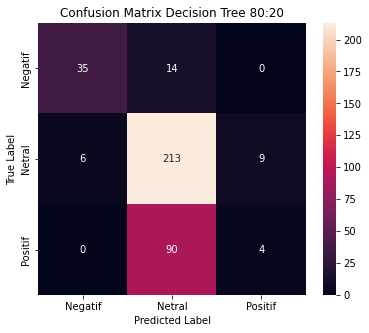

In [51]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y1_test, dt_predict1)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 80:20", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (75:25)

In [52]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf2 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf2.fit(x2_train_tfidf, y2_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf2.best_params_)

best parameter :  {'max_depth': 18, 'splitter': 'random'}


In [53]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf2.best_score_)

accuracy :  0.7192055051610886


### Decision Tree 75:25

In [55]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=18)
dt_clf2.fit(x2_train_tfidf, y2_train)

# Memprediksi label sentimen dengan data validasi
dt_predict2 = dt_clf2.predict(x2_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict2, y2_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict2, y2_test, digits=4))

Decision Tree Accuracy Score: 66.9546 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.7288    0.7818    0.7544        55
      netral     0.8671    0.6870    0.7666       361
     positif     0.1610    0.4043    0.2303        47

    accuracy                         0.6695       463
   macro avg     0.5857    0.6244    0.5838       463
weighted avg     0.7790    0.6695    0.7107       463



## Confusion Matrix Decision Tree 75:25

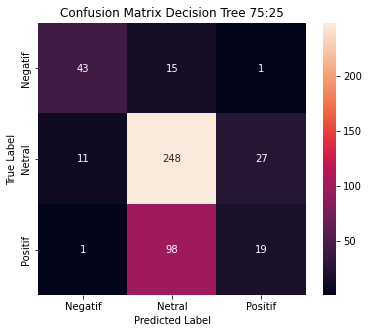

In [56]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y2_test, dt_predict2)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 75:25", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (70:30)

In [80]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf3 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf3.fit(x3_train_tfidf, y3_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf3.best_params_)

best parameter :  {'max_depth': 4, 'splitter': 'best'}


In [81]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf3.best_score_)

accuracy :  0.7229636255217652


### Decision Tree 70:30

In [86]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf3 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4)
dt_clf3.fit(x3_train_tfidf, y3_train)

# Memprediksi label sentimen dengan data validasi
dt_predict3 = dt_clf3.predict(x3_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict3, y3_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict3, y3_test, digits=4))

Decision Tree Accuracy Score: 69.4245 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.7500    0.8906    0.8143        64
      netral     0.9734    0.6714    0.7947       490
     positif     0.0000    0.0000    0.0000         2

    accuracy                         0.6942       556
   macro avg     0.5745    0.5207    0.5363       556
weighted avg     0.9442    0.6942    0.7941       556



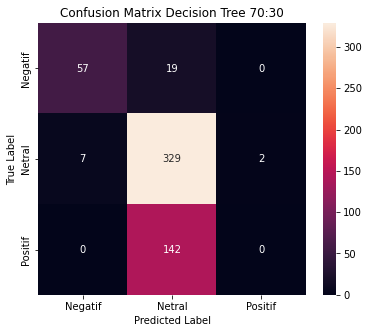

In [87]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y3_test, dt_predict3)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 70:30", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()